In [1]:
import oceanbench

oceanbench.__version__

'0.0.1a0'

### Open challenger datasets

> Insert here the code that opens the challenger datasets as `challenger_datasets: List[xarray.Dataset]`

In [2]:
# Open GLONET forecast sample with xarray
from functools import reduce
import xarray
from typing import List

LATITUDE_CLIMATE_FORECAST_ATTRIBUTES = {
    "standard_name": "latitude",
    "long_name": "Latitude",
    "units": "degrees_north",
    "units_long": "Degrees North",
    "axis": "Y",
}

LONGITUDE_CLIMATE_FORECAST_ATTRIBUTES = {
    "standard_name": "longitude",
    "long_name": "Longitude",
    "units": "degrees_east",
    "units_long": "Degrees East",
    "axis": "X",
}

DEPTH_CLIMATE_FORECAST_ATTRIBUTES = {
    "standard_name": "depth",
    "long_name": "Depth",
    "units": "m",
    "units_long": "Meters",
}

TIME_CLIMATE_FORECAST_ATTRIBUTES = {
    "standard_name": "time",
    "long_name": "Time",
    "axis": "T",
}


def _update_variable_attributes(
    dataset: xarray.Dataset,
    variable_name_and_attributes: tuple[str, dict[str, str]],
) -> xarray.Dataset:
    variable_name, attributes = variable_name_and_attributes
    dataset[variable_name].attrs = attributes
    return dataset


def _add_climate_forecast_attributes(
    dataset: xarray.Dataset,
) -> xarray.Dataset:
    return reduce(
        _update_variable_attributes,
        zip(
            ["lat", "lon", "depth", "time"],
            [
                LATITUDE_CLIMATE_FORECAST_ATTRIBUTES,
                LONGITUDE_CLIMATE_FORECAST_ATTRIBUTES,
                DEPTH_CLIMATE_FORECAST_ATTRIBUTES,
                TIME_CLIMATE_FORECAST_ATTRIBUTES,
            ],
        ),
        dataset,
    )


challenger_datasets: List[xarray.Dataset] = [
    _add_climate_forecast_attributes(
        xarray.open_dataset(
            "https://minio.dive.edito.eu/project-glonet/public/glonet_reforecast_2024/2024-01-03.zarr",
            engine="zarr",
        )
    )
]


### Evaluation of challenger datasets using OceanBench

#### Root Mean Square Error (RMSE) compared to GLORYS

In [3]:
oceanbench.metrics.rmse_to_glorys(challenger_datasets)

,Lead day 1,Lead day 2,Lead day 3,Lead day 4,Lead day 5,Lead day 6,Lead day 7,Lead day 8,Lead day 9,Lead day 10
Surface temperature,0.659611,0.675301,0.725245,0.724560,0.805426,0.807227,0.888620,0.869715,0.944387,0.925018
50m temperature,0.966279,0.981624,1.003170,1.022845,1.060496,1.097911,1.136152,1.187038,1.216651,1.282137
200m temperature,0.830070,0.835607,0.839491,0.843784,0.842975,0.854395,0.860074,0.873203,0.882551,0.896545
550m temperature,0.529752,0.531733,0.521913,0.524355,0.526169,0.529719,0.536765,0.539467,0.548115,0.552867
Surface salinity,0.792587,0.790434,0.795696,0.792178,0.787018,0.781515,0.780387,0.776530,0.778576,0.771986
50m salinity,0.350590,0.350406,0.358510,0.359323,0.364514,0.365943,0.370236,0.371366,0.375886,0.378222
200m salinity,0.153813,0.154191,0.154294,0.154740,0.155240,0.156228,0.157211,0.158202,0.159406,0.160655
550m salinity,0.090489,0.090457,0.090514,0.090479,0.091398,0.091490,0.092668,0.092761,0.093978,0.094302
Surface height,0.072550,0.072811,0.072279,0.074205,0.077055,0.077814,0.080816,0.080644,0.084408,0.085529
Surface northward velocity,0.116657,0.119014,0.122878,0.123277,0.125830,0.127524,0.132315,0.133787,0.139171,0.139889


#### Mixed Layer Depth (MLD) analysis

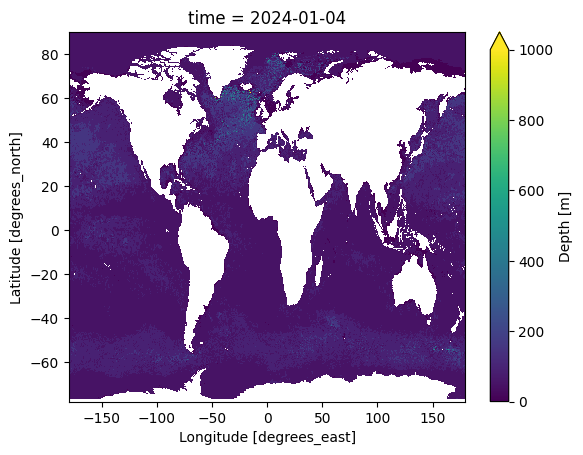

In [4]:
oceanbench.derived_quantities.mld(challenger_datasets)

#### Geostrophic current analysis

/home/github-runner/actions-runner/_work/oceanbench/oceanbench/oceanbench/core/process/calc_geo_core.py:26: RuntimeWarning: divide by zero encountered in divide
  u_geo = -g / f[:, numpy.newaxis] * dssh_dy
/home/github-runner/actions-runner/_work/oceanbench/oceanbench/oceanbench/core/process/calc_geo_core.py:26: RuntimeWarning: invalid value encountered in multiply
  u_geo = -g / f[:, numpy.newaxis] * dssh_dy
/home/github-runner/actions-runner/_work/oceanbench/oceanbench/oceanbench/core/process/calc_geo_core.py:27: RuntimeWarning: divide by zero encountered in divide
  v_geo = g / f[:, numpy.newaxis] * dssh_dx
/home/github-runner/actions-runner/_work/oceanbench/oceanbench/oceanbench/core/process/calc_geo_core.py:27: RuntimeWarning: invalid value encountered in multiply
  v_geo = g / f[:, numpy.newaxis] * dssh_dx


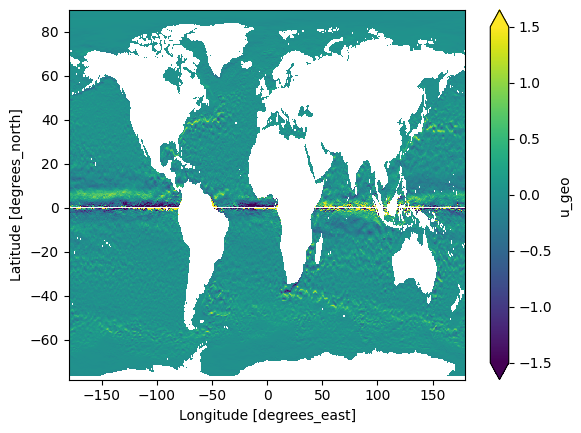

In [5]:
oceanbench.derived_quantities.geostrophic_currents(challenger_datasets)

#### Density analysis

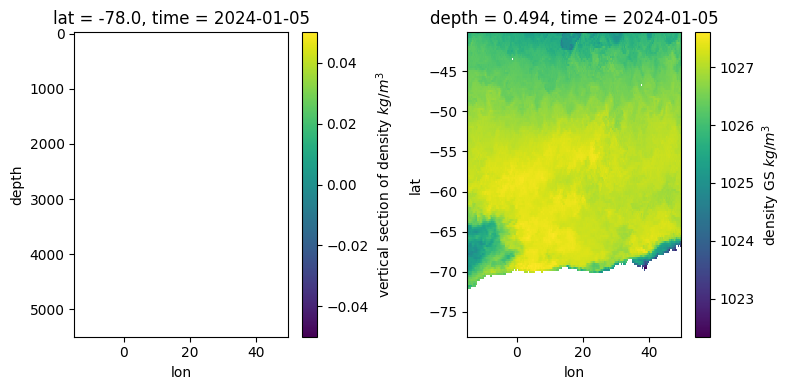

In [6]:
oceanbench.derived_quantities.density(challenger_datasets)

#### Euclidean distance to GLORYS reference

466
start


INFO: Output files are stored in tst.zarr.


<class 'numpy.ndarray'>


466
start


INFO: Output files are stored in tst.zarr.


<class 'numpy.ndarray'>


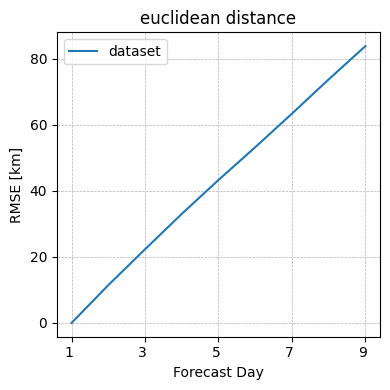

In [7]:
oceanbench.metrics.euclidean_distance_to_glorys(challenger_datasets)

#### Energy cascading analysis

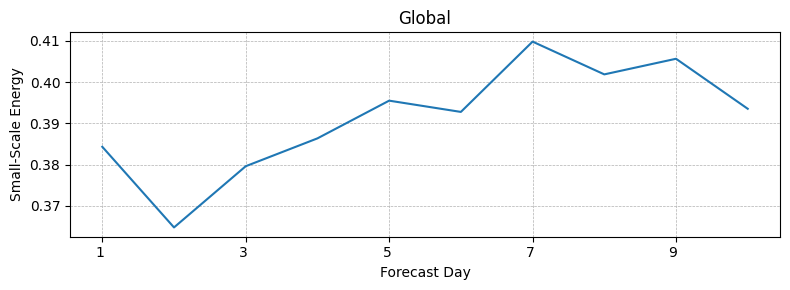

In [8]:
oceanbench.metrics.energy_cascade(challenger_datasets)

#### Kinetic energy analysis

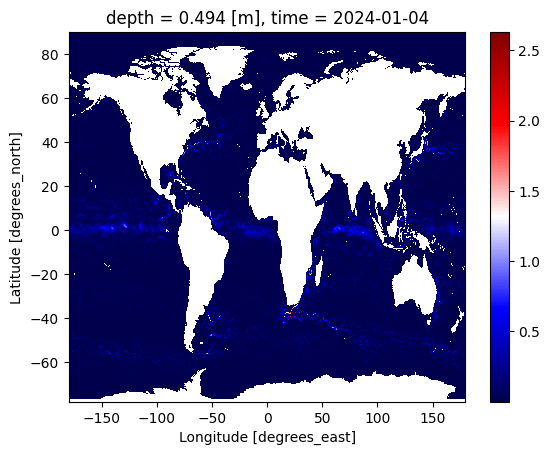

In [9]:
oceanbench.derived_quantities.kinetic_energy(challenger_datasets)

#### Vorticity analysis

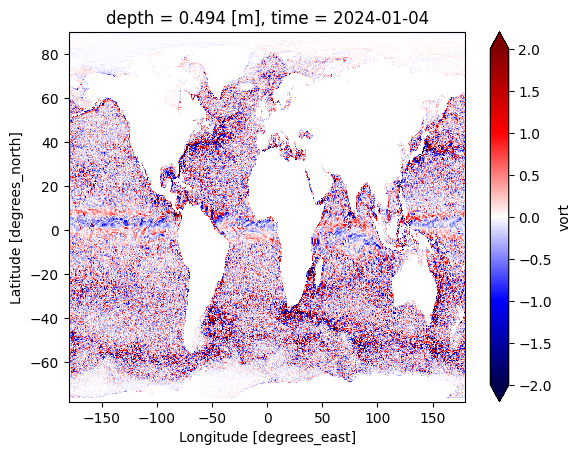

In [10]:
oceanbench.derived_quantities.vorticity(challenger_datasets)

#### Mass conservation analysis

In [11]:
oceanbench.derived_quantities.mass_conservation(challenger_datasets)

[-1.03391335e-08 -1.28428394e-08 -1.16979252e-08 -1.41945821e-08
 -1.54307116e-08 -9.51230823e-09 -1.20808228e-08 -1.08712131e-08
 -1.52097767e-08 -1.30613604e-08]
